In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy as sp
%matplotlib inline

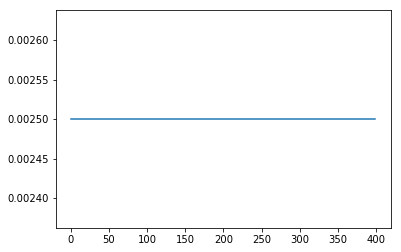

float64


In [2]:
top_hat = signal.boxcar(400)/400
plt.plot(top_hat)
plt.show()
print(top_hat.dtype)

float64
float64


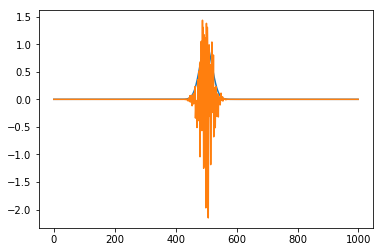

In [3]:
gaussian = signal.gaussian(1000,20)
gaussian2 = gaussian *np.random.normal(0,1,1000)
plt.plot(gaussian)
plt.plot(gaussian2)
print(gaussian.dtype)
print(gaussian2.dtype)

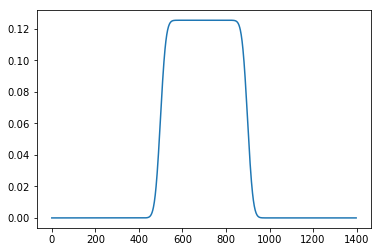

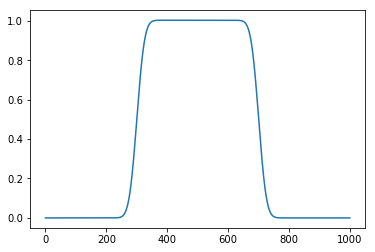

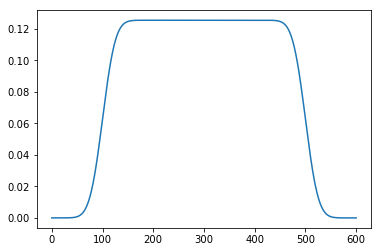

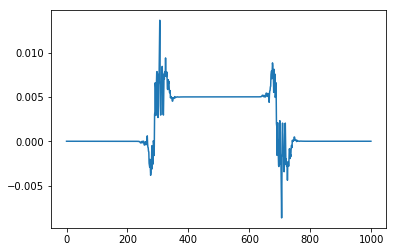

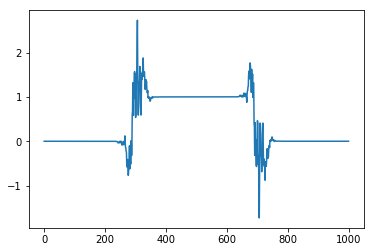

In [4]:
convolved1=np.convolve(top_hat,gaussian)
plt.plot(convolved1)
plt.show()
convolved2=8*np.convolve(top_hat,gaussian,'same')
plt.plot(convolved2)
plt.show()
convolved3=np.convolve(top_hat,gaussian,'valid')
plt.plot(convolved3)
plt.show()
convolved4=np.convolve(top_hat,gaussian2,'same')
plt.plot(convolved4)
plt.show()
plt.plot(convolved4/np.sum(convolved4)*len(top_hat))

In [5]:
np.sum(convolved4)

2.001057674449398

In [6]:
normed=(convolved2/np.amax(convolved2))

In [7]:
print(np.amax(convolved2))
print(np.sum(convolved2)/len(top_hat))
#len(convolved2)/np.amax(convolved2)#/len(top_hat)*20

1.00265130985
1.00265130985


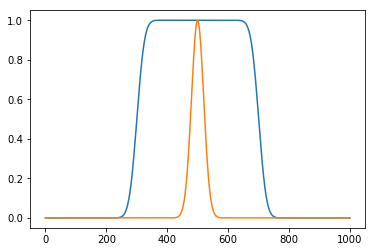

0.466299010931
0.181482238512


In [8]:
plt.plot(normed)
plt.plot(gaussian)
plt.show()
print(np.std(normed))
print(np.std(gaussian))

In [9]:
signal = []
for ii in range(100):
    signal = np.append(signal,gaussian2)

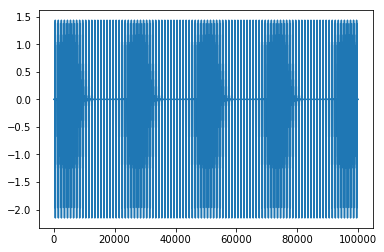

In [10]:
plt.plot(signal)

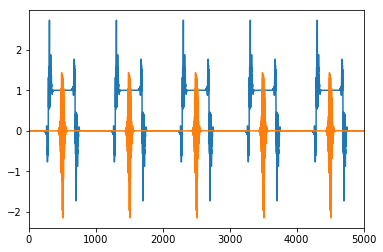

In [11]:
convolved_big=np.convolve(top_hat,signal,'same')
#plt.plot(convolved_big/np.amax(convolved_big))
plt.plot(convolved_big/np.sum(convolved_big)*len(top_hat)*100)
plt.plot(signal)
plt.xlim(0,5000)
plt.show()

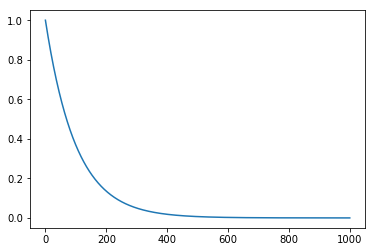

In [12]:
# sample rate is 0.01 seconds
width = 1000
tau_scatter = 2
N_Tau = 10
t = np.linspace(0,N_Tau*tau_scatter,width)
EXP = np.exp(-t/tau_scatter)
plt.plot(EXP)
plt.show()

[  7.14747771e-138   2.48848585e-137   8.64234911e-137   2.99393729e-136
   1.03458900e-135   3.56621300e-135   1.22619902e-134   4.20560918e-134
   1.43883544e-133   4.91029520e-133   1.67154604e-132   5.67601254e-132
   1.92257200e-131   6.49585236e-131   2.18929327e-130   7.36013874e-130
   2.46821123e-129   8.25644155e-129   2.75497563e-128   9.16973692e-128
   3.04445987e-127   1.00827244e-126   3.33088625e-126   1.09763001e-125
   3.60799897e-125   1.18301732e-124   3.86927915e-124   1.26236019e-123
   4.10819242e-123   1.33362132e-122   4.31845646e-122   1.39488635e-121
   4.49431357e-121   1.44444888e-120   4.63079173e-120   1.48088926e-119
   4.72393793e-119   1.50314212e-118   4.77100830e-118   1.51054811e-117
   4.77060234e-117   1.50288633e-116   4.72273216e-116   1.48038529e-115
   4.62882191e-115   1.44371160e-114   4.49163732e-114   1.39393712e-113
   4.31515050e-113   1.33248698e-112   4.10434886e-112   1.26107183e-111
   3.86500129e-111   1.18160883e-110   3.60339668e-

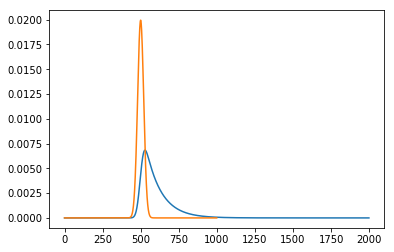

EXP_sum= 100.396321375
exp_convolved1 sum= 6.84720101727e-05
exp_convolved1 sum/EXP_sum 6.8201712209e-07
max 6.84720101727e-05
0.02


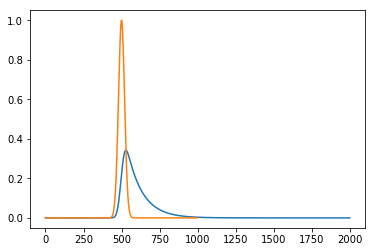

In [17]:
dx = N_Tau*tau_scatter/width
EXP_sum = np.sum(EXP)#*dx
EXP_norm = EXP / EXP_sum
gaussian_norm = gaussian/ np.sum(gaussian)
print(gaussian_norm)
print(np.sum(gaussian))
exp_convolved1=np.convolve(EXP_norm, gaussian_norm, mode='valid')
exp_conv = sp.signal.convolve(EXP_norm, gaussian_norm, mode='full')
print(len(EXP_norm))
print(len(gaussian_norm))
plt.plot(exp_conv)
plt.plot(gaussian_norm)
#plt.xlim(0,800)
plt.show()
print('EXP_sum=',EXP_sum)
print('exp_convolved1 sum=',np.sum(exp_convolved1))
print('exp_convolved1 sum/EXP_sum',np.sum(exp_convolved1)/EXP_sum)
print('max',np.amax(exp_convolved1))
print(dx)
plt.plot(exp_conv*np.sum(gaussian))
plt.plot(gaussian)
#plt.xlim(0,800)
plt.show()

So the lesson here seems to normalize both the profile and the exponential and then renormalize the profile by multiplying by the original area. Also, keep the lengths the same and use an N_tau the is appropriate to the window.

In [14]:
np.exp(-6.9)

0.0010077854290485105

In [15]:
import pyfftw

ModuleNotFoundError: No module named 'pyfftw'

In [ ]:
a = pyfftw.empty_aligned((4048, 4048), dtype='complex64')
print(a.shape)
a[:] = np.random.randn(*a.shape) + 1j*np.random.randn(*a.shape)
print(a.shape)
%timeit np.fft.fft2(a)

In [ ]:
%time pyfftw.interfaces.numpy_fft.fft2(a)

In [ ]:
%timeit sp.fftpack.fft2(a)

In [ ]:
%timeit pyfftw.interfaces.scipy_fftpack.fft2(a)

In [ ]:
#2024 x 2024 142 ms vs 358 ms
#4048 x 4048  vs 1.65 

In [ ]:
import timeit

In [ ]:
help(timeit)

In [ ]:
pyfftw.interfaces.scipy_fftpack.